## ANALYSE D'UNE BASE DE DONNEES GENEREE SUR PYTHON

In [1]:
#Importation de nos librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
# Génération des données
np.random.seed(42)
n_patients = 200

df = pd.DataFrame ({
    'age': np.random.normal(45, 15, n_patients).astype(int),
    'sexe': np.random.choice(['H', 'F'], n_patients),
    'groupe_sanguin': np.random.choice(['A+', 'A-', 'B+', 'B-', 'AB+', 'AB-', 'O+', 'O-'], n_patients),
    'tension_arterielle': np.random.normal(120, 15, n_patients).astype(int),
    'cholesterol': np.random.normal(190, 30, n_patients).astype(int),
    'diabete': np.random.choice(['Oui', 'Non'], n_patients, p=[0.2, 0.8]),
    'activite_physique': np.random.choice(['Sédentaire', 'Modérée', 'Intense'], n_patients),
    'imc': np.random.normal(25, 4, n_patients)
})

# Sauvegarde en CSV
df.to_csv("cardiometabo_data.csv", index=False)

In [3]:
df

,age,sexe,groupe_sanguin,tension_arterielle,cholesterol,diabete,activite_physique,imc
0,52,F,AB+,118,216,Non,Modérée,31.742593
1,42,F,B-,126,180,Non,Intense,23.158818
2,54,H,B+,130,226,Non,Modérée,31.928861
3,67,F,A+,113,177,Non,Sédentaire,29.300331
4,41,H,A+,123,128,Oui,Modérée,34.474237
...,...,...,...,...,...,...,...,...
195,50,H,O+,113,195,Non,Modérée,26.688053
196,31,H,A+,125,164,Non,Modérée,20.762431
197,47,H,B+,113,211,Non,Modérée,26.910215
198,45,H,AB+,124,172,Non,Intense,27.959000


## Analyse descriptive de nos variables

0      F
1      F
2      H
3      F
4      H
      ..
195    H
196    H
197    H
198    H
199    H
Name: sexe, Length: 200, dtype: object
sexe
F    111
H     89
Name: count, dtype: int64


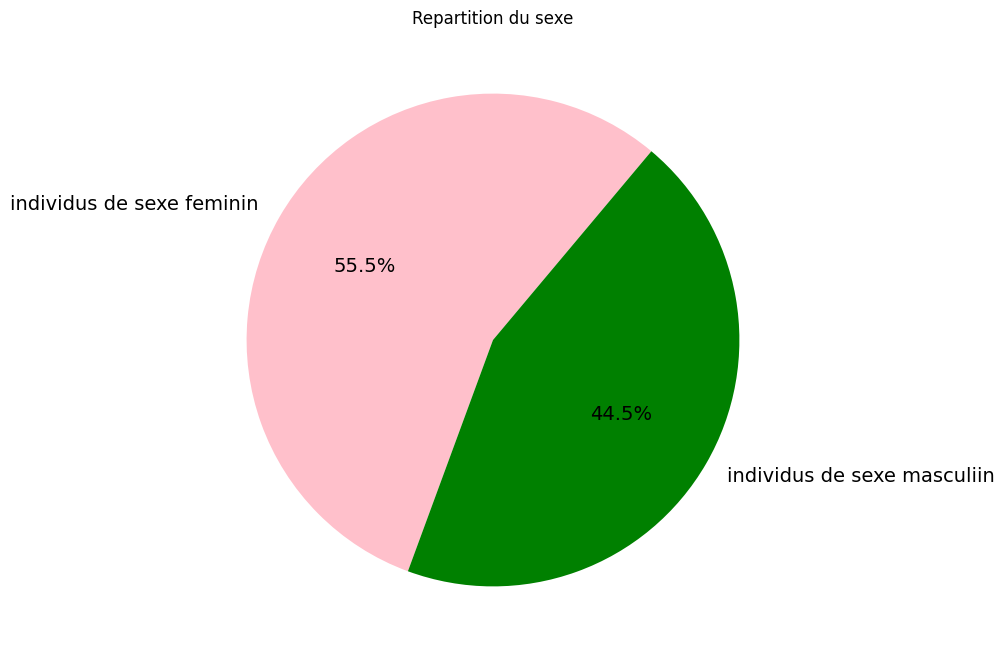

In [4]:
#Description de la variable sexe

sexebd = df.loc[:,"sexe"]
print(sexebd)

#Realisation d'un tableau d'effectifs

effectifs = sexebd.value_counts()
print(effectifs)

#Creation d'un Camembert de la variable sexe

plt.figure(figsize = (10, 8))
plt.pie(effectifs, labels = ["individus de sexe feminin", "individus de sexe masculiin"],
        colors = ["Pink", "Green"],                                                       #la couleur des parts
        autopct = "%1.1f%%",                                                             #le pourcentage automatique de chaque part
        textprops = {"fontsize": 14, "color": "black"},                                  #Proportion du texte
        startangle = 50,                                                                 #La taille de la sortie
        radius = 1 )                                                                     #La taille du camembert
plt.title("Repartition du sexe")
plt.show()

## Dans notre population nous constatons que les femmes sont en superiorité (55.5%) numerique par rapport aux hommes(44.5%)

activite_physique
Modérée       75
Intense       64
Sédentaire    61
Name: count, dtype: int64


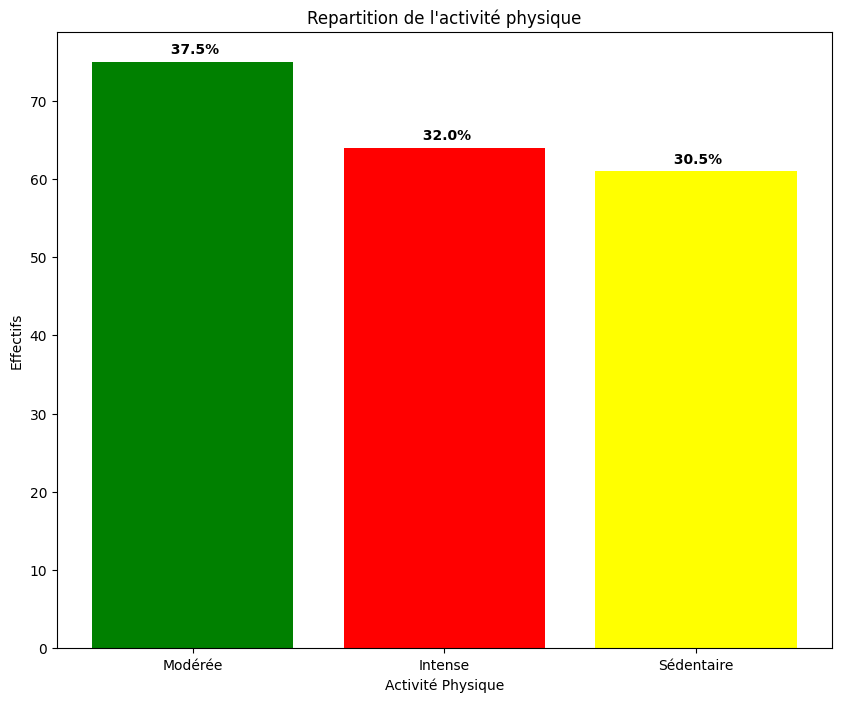

In [5]:
#Description de la variable activite physique

#Realisation d'un tableau d'effectifs

actf = df.loc[:, "activite_physique"]
effactf = actf.value_counts()
print(effactf)

#Creation d'un diagramme à barres pour la variable activité physique

#Calcul des pourcentages

total = sum(effactf)
pourcentages = [(n/total) * 100 for n in effactf]

#Creation du diagramme

plt.figure(figsize = (10, 8))
plt.bar(effactf.index, effactf.values, color = ["Green", "Red", "Yellow"] )

#Ajout des pourcentages

for i, (val,pct) in enumerate(zip(effactf, pourcentages)) :      #Zip- assemble les deux listes element par element, 
                                                                 #ennumerate- ajoute un indice i à chaque couple                       
 
    plt.text(i,                                                  #plt.text - est la commande qui ajoute le texte, x =i- position horizontale la barre  
             val + 1,                                            #y =val +1 - un peu au dessus de la barre
             f"{pct : .1f}%",                                    #f"{pct:.1f}"- texte affiché(pct:.1f -un chiffre après la virgule
             ha = "center",                                      #ha ='center' -centrer le texte horizontalement par rapport à la barre
             fontsize= 10, fontweight= "bold")                   #fontsize et fontweight - style d'écriture)


#Titre et Labels

plt.xlabel("Activité Physique")
plt.ylabel("Effectifs")
plt.title("Repartition de l'activité physique")
plt.show()

## Nous constatons que dans notre base de données: 
- 37.5% des individus ont une activité physique modérée
- 32.0% des individus ont une activité physique intense
- 30.5% n'ont pas d'activité physique

groupe_sanguin  A+  A-  AB+  AB-  B+  B-  O+  O-
sexe                                            
F               16  14   20    7   8  21  15  10
H               12  13   15    9  17   7   9   7


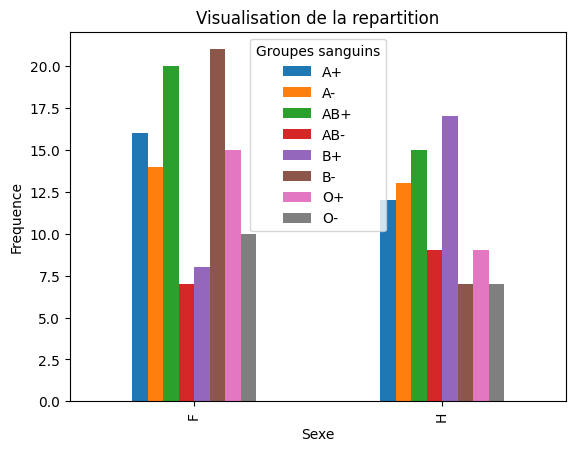

In [6]:
#Description de la variable groupe sanguin

#Tableau croisé avec la variable sexe

gsbd = df.loc[:,"groupe_sanguin"]
tc = pd.crosstab(sexebd, gsbd)
print(tc) 

#Graphique en barres

tc.plot(kind = "bar")

#Titre et labels

plt.title("Visualisation de la repartition")
plt.xlabel("Sexe")
plt.ylabel("Frequence")
plt.legend(title = "Groupes sanguins")
plt.show()

## Nous constatons que le groupe sanguin le plus represente dans notre base de donnees est le groupe AB+

count    200.00000
mean      43.89000
std       13.94598
min        5.00000
25%       34.00000
50%       44.50000
75%       52.00000
max       85.00000
Name: age, dtype: float64


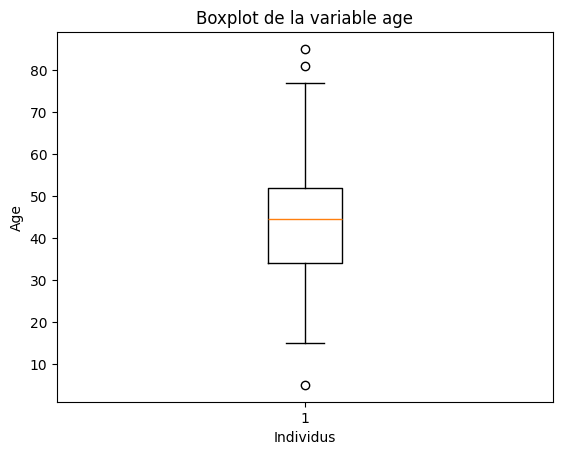

     age sexe groupe_sanguin  tension_arterielle  cholesterol diabete  \
113   81    F             O-                 116          166     Non   
179   85    F             B+                 103          151     Non   

    activite_physique        imc  
113        Sédentaire  25.667078  
179        Sédentaire  31.234720  
    age sexe groupe_sanguin  tension_arterielle  cholesterol diabete  \
74    5    F             A+                 144          214     Non   

   activite_physique        imc  
74           Intense  22.031921  


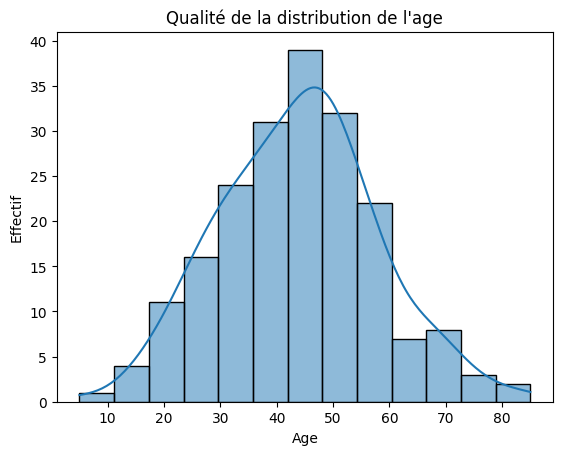

Statistique de test 0.045649977437011824
Valeur de p 0.7812254489052959
Les données suivent une distribution normale


In [7]:
#Description de la variable age

agebd= df.loc[:,"age"]

#Statistiques descriptives

print(agebd.describe())

#Identification des valeurs aberrantes

plt.boxplot(agebd)
plt.xlabel("Individus")
plt.ylabel("Age")
plt.title("Boxplot de la variable age")
plt.show()

#Afficher les individus correspondant aux valeurs aberrantes

print(df[agebd >= 80])
print(df[agebd < 10])

#Verification de la normalité de la distribution

sns.histplot(agebd, kde = True)            #on verifie la normalité grace à seaborn, kde permet de visualiser la distribution
plt.title("Qualité de la distribution de l'age")
plt.ylabel("Effectif")
plt.xlabel("Age")
plt.show()

#Test de kolmogorov-smirnov
#Il est important de specifier les arguments(moyenne et ecart type), car sans eux j'ai d'abord obtenu un resultat erroné(distri pas norm)

moy = agebd.mean()
sd = agebd.std()
stat, p = stats.kstest(agebd, "norm", args = (moy, sd))
print("Statistique de test", stat)
print("Valeur de p", p)
if p > 0.05:
    print("Les données suivent une distribution normale")
else:
    print("Les données ne suivent pas une distribution normale")

## Nous constatons que l'age moyen dans notre base de donnees est de 43 +/- 14 ans avec un minimum de 5 ans et un maximum de 85 ans

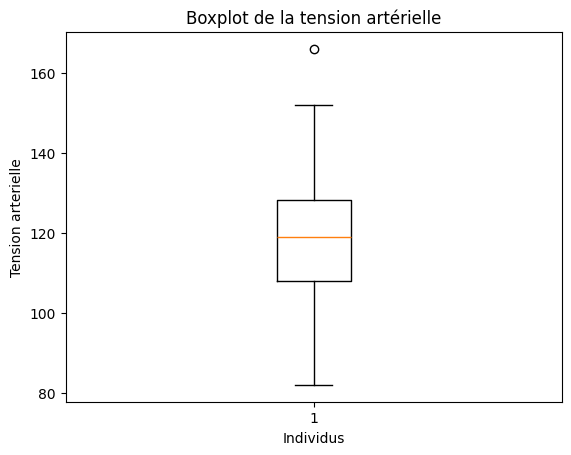

     age sexe groupe_sanguin  tension_arterielle  cholesterol diabete  \
116   44    F            AB+                 166          218     Non   

    activite_physique        imc  
116           Modérée  27.472115  


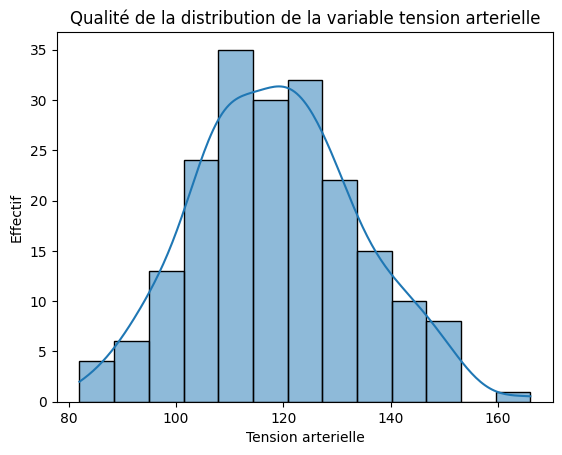

Statistique de test 0.05466129062248137
Valeur de p 0.5695785400214045
Les données suivent une distribution normale


count    200.000000
mean     118.835000
std       15.179256
min       82.000000
25%      108.000000
50%      119.000000
75%      128.250000
max      166.000000
Name: tension_arterielle, dtype: float64

In [8]:
#Description de la variable tension artérielle

tensar = df.loc[:,"tension_arterielle"]

#Identification des valeurs aberrantes

plt.boxplot(tensar)
plt.xlabel("Individus")
plt.ylabel("Tension arterielle")
plt.title("Boxplot de la tension artérielle")
plt.show()

#Afficher l'individus correspondant à la valeur aberrante

print(df[tensar > 160])

#Verification de la normalité de la distribution

sns.histplot(tensar, kde = True)            
plt.title("Qualité de la distribution de la variable tension arterielle")
plt.ylabel("Effectif")
plt.xlabel("Tension arterielle")
plt.show()

#Test de kolmogorov-smirnov

moy = tensar.mean()
sd = tensar.std()
stat, p = stats.kstest(tensar, "norm", args = (moy, sd))
print("Statistique de test", stat)
print("Valeur de p", p)
if p > 0.05:
    print("Les données suivent une distribution normale")
else:
    print("Les données ne suivent pas une distribution normale")

#Statistique descriptive

tensar.describe()


## Nous constatons que la valeur moyenne de la tension chez nos individus est de 118.8 +/- 15.17 avec un minimum de 82 et un maximum de 166

   age sexe groupe_sanguin  tension_arterielle  cholesterol diabete  \
0   52    F            AB+                 118          216     Non   
1   42    F             B-                 126          180     Non   
2   54    H             B+                 130          226     Non   
3   67    F             A+                 113          177     Non   
4   41    H             A+                 123          128     Oui   

  activite_physique        imc tens_categories  
0           Modérée  31.742593         Normale  
1           Intense  23.158818         Normale  
2           Modérée  31.928861    Hypertension  
3        Sédentaire  29.300331         Normale  
4           Modérée  34.474237         Normale  
tens_categories
Normale         145
Hypertension     50
Hypotension       5
Name: count, dtype: int64


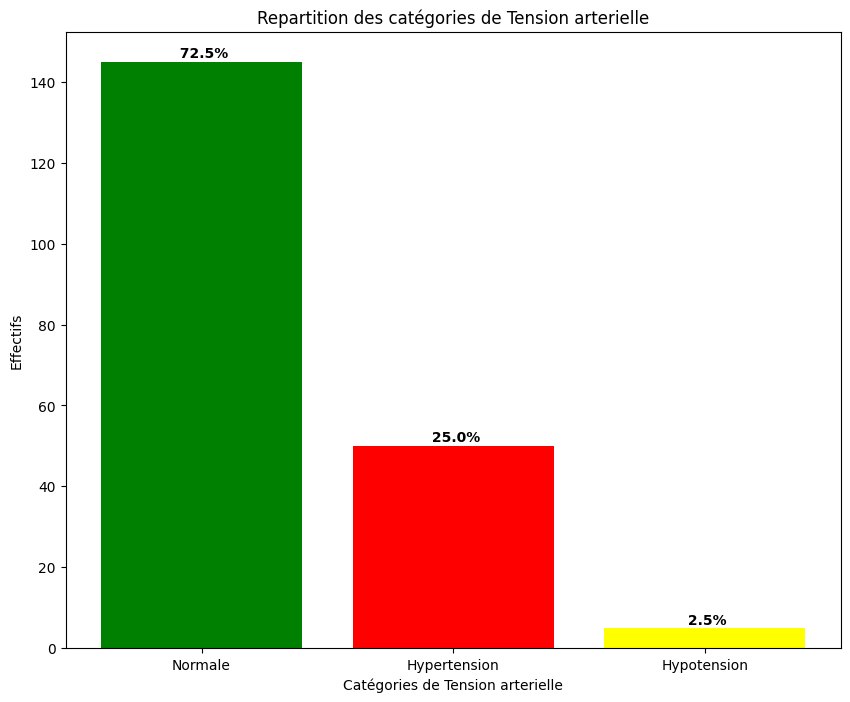

In [9]:
#Creation de categories

bornes = [0, 90, 129, float('inf')]
categories = ['Hypotension','Normale','Hypertension']
df['tens_categories'] = pd.cut(df['tension_arterielle'], bins = bornes, labels = categories, right = False)
print(df.head())

#Resumé statistique
tens_eff = df['tens_categories'].value_counts()
print (tens_eff)

#Visualisation

#Calcul des pourcentages

total = sum(tens_eff)
pourcentages = [(n/total) * 100 for n in tens_eff]

#Creation du diagramme

plt.figure(figsize = (10, 8))
plt.bar(tens_eff.index, tens_eff.values, color = ["Green", "Red", "Yellow"] )

#Ajout des pourcentages

for i, (val,pct) in enumerate(zip(tens_eff, pourcentages)) :      #Zip- assemble les deux listes element par element, 
                                                                 #ennumerate- ajoute un indice i à chaque couple                       
 
    plt.text(i,                                                  #plt.text - est la commande qui ajoute le texte, x =i- position horizontale la barre  
             val + 1,                                            #y =val +1 - un peu au dessus de la barre
             f"{pct : .1f}%",                                    #f"{pct:.1f}"- texte affiché(pct:.1f -un chiffre après la virgule
             ha = "center",                                      #ha ='center' -centrer le texte horizontalement par rapport à la barre
             fontsize= 10, fontweight= "bold")                   #fontsize et fontweight - style d'écriture)


#Titre et Labels

plt.xlabel("Catégories de Tension arterielle")
plt.ylabel("Effectifs")
plt.title("Repartition des catégories de Tension arterielle")
plt.show()
    


## Une tres grande partie  de nos individus ont une tension arterielle normale (72.5%), avec 25% qui ont sont en Hypersention et 2.5% qui sont en Hypotension 

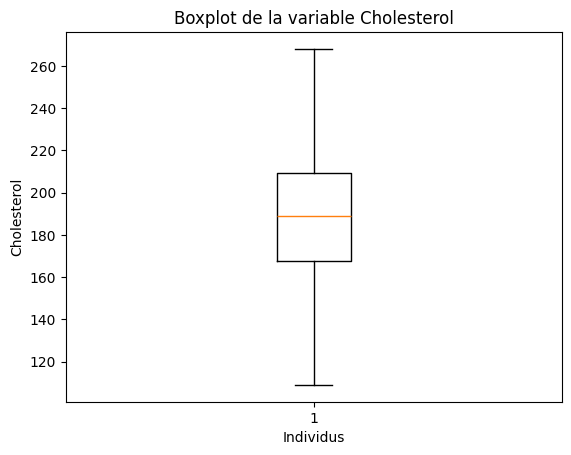

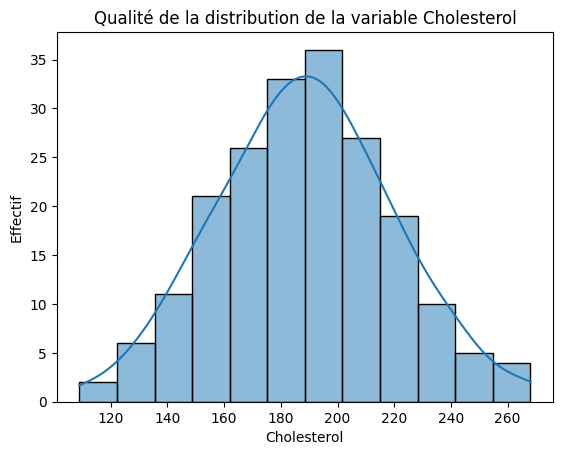

Statistique de test 0.02634156313953806
Valeur de p 0.9985160217252304
Les données suivent une distribution normale


count    200.000000
mean     188.430000
std       30.755726
min      109.000000
25%      167.750000
50%      189.000000
75%      209.250000
max      268.000000
Name: cholesterol, dtype: float64

In [10]:
#Description de la variable Cholesterol

chol = df.loc[:,"cholesterol"]

#Identification des valeurs aberrantes

plt.boxplot(chol)
plt.xlabel("Individus")
plt.ylabel("Cholesterol")
plt.title("Boxplot de la variable Cholesterol")
plt.show()

#Verification de la normalité de la distribution

sns.histplot(chol, kde = True)            
plt.title("Qualité de la distribution de la variable Cholesterol")
plt.ylabel("Effectif")
plt.xlabel("Cholesterol")
plt.show()

#Test de kolmogorov-smirnov

moy = chol.mean()
sd = chol.std()
stat, p = stats.kstest(chol, "norm", args = (moy, sd))
print("Statistique de test", stat)
print("Valeur de p", p)
if p > 0.05:
    print("Les données suivent une distribution normale")
else:
    print("Les données ne suivent pas une distribution normale") 

#Statistique descriptive

chol.describe()

## Nous constatons que la valeur moyenne du cholesterol chez nos individus est de 188.4 +/- 30.75 avec un minimum de 109 et un maximum de 268

   age sexe groupe_sanguin  tension_arterielle  cholesterol diabete  \
0   52    F            AB+                 118          216     Non   
1   42    F             B-                 126          180     Non   
2   54    H             B+                 130          226     Non   
3   67    F             A+                 113          177     Non   
4   41    H             A+                 123          128     Oui   

  activite_physique        imc tens_categories chol_categories  
0           Modérée  31.742593         Normale           Eleve  
1           Intense  23.158818         Normale          Normal  
2           Modérée  31.928861    Hypertension           Eleve  
3        Sédentaire  29.300331         Normale          Normal  
4           Modérée  34.474237         Normale          Normal  
chol_categories
Normal        130
Eleve          57
Tres eleve     13
Name: count, dtype: int64


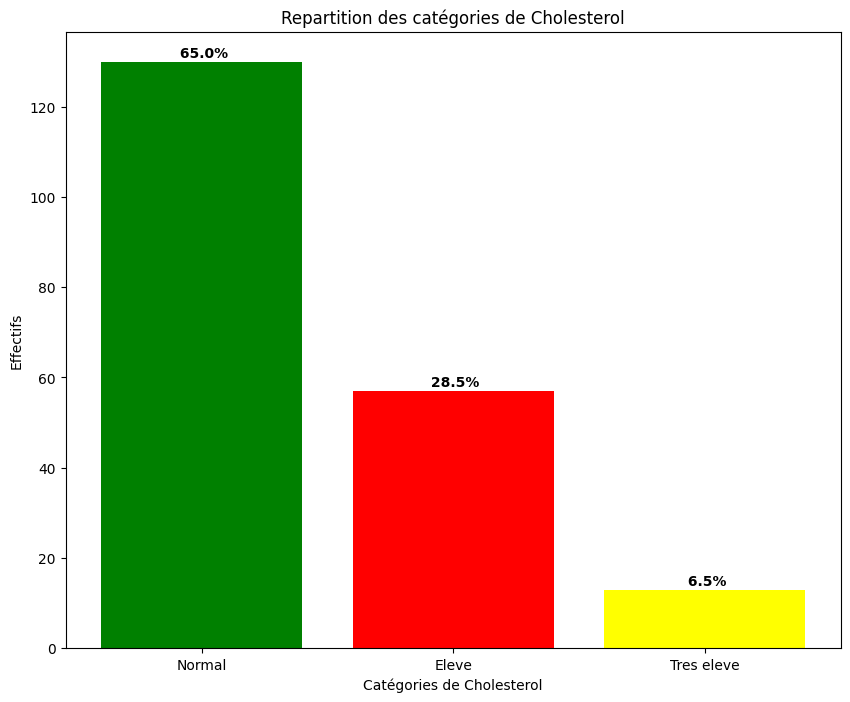

In [11]:
#Creation de categories

bornes = [0, 200, 239, float('inf')]
categories = [ 'Normal','Eleve','Tres eleve']
df['chol_categories'] = pd.cut(df['cholesterol'], bins = bornes, labels = categories, right = False)
print(df.head())

#Resumé statistique
chol_eff = df['chol_categories'].value_counts()
print (chol_eff)

#Visualisation

#Calcul des pourcentages

total = sum(chol_eff)
pourcentages = [(n/total) * 100 for n in chol_eff]

#Creation du diagramme

plt.figure(figsize = (10, 8))
plt.bar(chol_eff.index, chol_eff.values, color = ["Green", "Red", "Yellow"] )

#Ajout des pourcentages

for i, (val,pct) in enumerate(zip(chol_eff, pourcentages)) :      #Zip- assemble les deux listes element par element, 
                                                                 #ennumerate- ajoute un indice i à chaque couple                       
 
    plt.text(i,                                                  #plt.text - est la commande qui ajoute le texte, x =i- position horizontale la barre  
             val + 1,                                            #y =val +1 - un peu au dessus de la barre
             f"{pct : .1f}%",                                    #f"{pct:.1f}"- texte affiché(pct:.1f -un chiffre après la virgule
             ha = "center",                                      #ha ='center' -centrer le texte horizontalement par rapport à la barre
             fontsize= 10, fontweight= "bold")                   #fontsize et fontweight - style d'écriture)

#Titre et Labels

plt.xlabel("Catégories de Cholesterol")
plt.ylabel("Effectifs")
plt.title("Repartition des catégories de Cholesterol")
plt.show() 

## Une grande majorite de nos individus ont une taux de cholesterol normal (65%), avec 25% qui ont un taux de cholesterol eleve et 6.5% qui ont un taux tres eleve 

diabete
Non    165
Oui     35
Name: count, dtype: int64


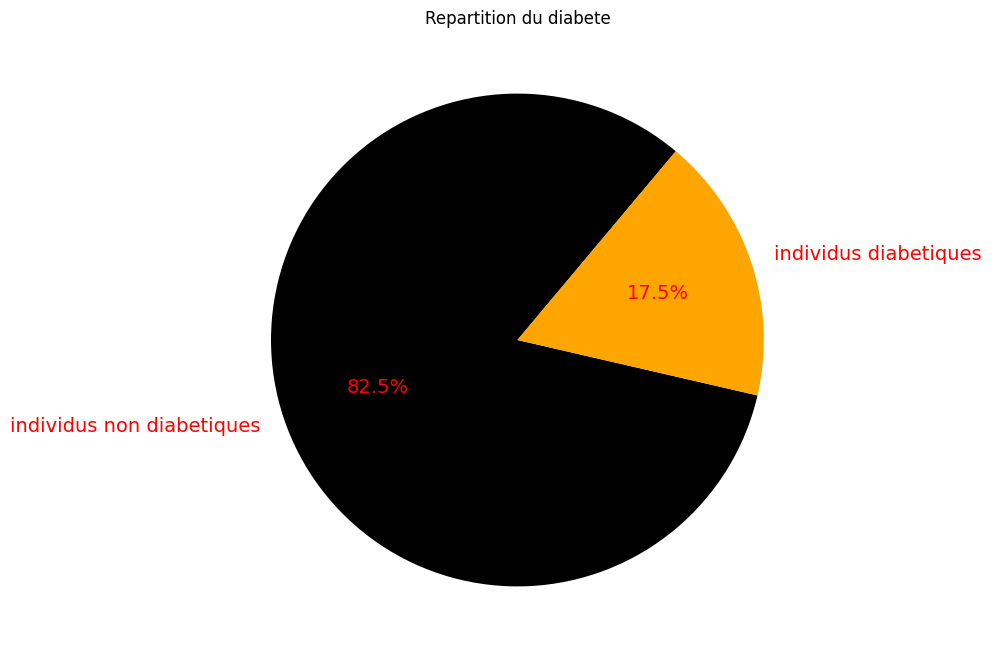

In [12]:
#Description de la variable diabete

dia_eff = df["diabete"].value_counts()
print(dia_eff)
plt.figure(figsize = (10, 8))
plt.pie(dia_eff, labels = ["individus non diabetiques", "individus diabetiques"],
        colors = ["Black", "Orange"],                                                       #la couleur des parts
        autopct = "%1.1f%%",                                                             #le pourcentage automatique de chaque part
        textprops = {"fontsize": 14, "color": "Red"},                                  #Proportion du texte
        startangle = 50,                                                                 #La taille de la sortie
        radius = 1 )                                                                     #La taille du camembert
plt.title("Repartition du diabete")
plt.show()


## Dans notre base de donnees seul 17.5% de nos individus sont diabetiques

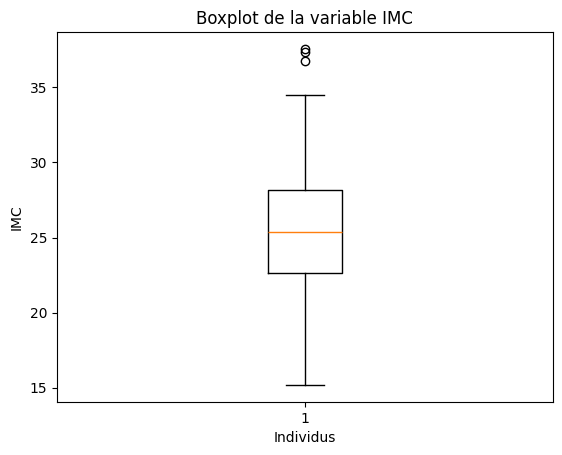

     age sexe groupe_sanguin  tension_arterielle  cholesterol diabete  \
15    36    F            AB+                 122          213     Non   
29    40    F             B+                 127          175     Non   
152   34    F            AB+                 111          188     Non   

    activite_physique        imc tens_categories chol_categories  
15         Sédentaire  37.376196         Normale           Eleve  
29         Sédentaire  36.784851         Normale          Normal  
152        Sédentaire  37.567868         Normale          Normal  


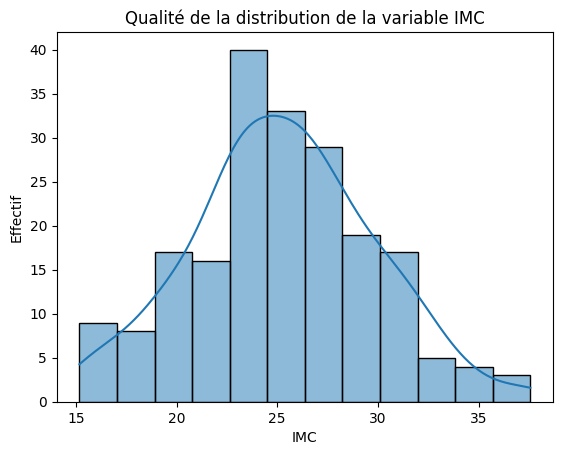

Statistique de test 0.03501208393945643
Valeur de p 0.9597783871858722
Les données suivent une distribution normale


count    200.000000
mean      25.290775
std        4.497896
min       15.179500
25%       22.666316
50%       25.336844
75%       28.191097
max       37.567868
Name: imc, dtype: float64

In [13]:
#Description de la variable IMC 

imc = df.loc[:,"imc"]

#Identification des valeurs aberrantes

plt.boxplot(imc)
plt.xlabel("Individus")
plt.ylabel("IMC")
plt.title("Boxplot de la variable IMC")
plt.show()

print(df[imc > 35])

#Verification de la normalité de la distribution

sns.histplot(imc, kde = True)            
plt.title("Qualité de la distribution de la variable IMC")
plt.ylabel("Effectif")
plt.xlabel("IMC")
plt.show()

#Test de kolmogorov-smirnov

moy = imc.mean()
sd = imc.std()
stat, p = stats.kstest(imc, "norm", args = (moy, sd))
print("Statistique de test", stat)
print("Valeur de p", p)
if p > 0.05:
    print("Les données suivent une distribution normale")
else:
    print("Les données ne suivent pas une distribution normale") 

#Statistique descriptive

imc.describe()

## Nous constatons que la valeur moyenne de l'IMC chez nos individus est de 25.3 +/- 4.5 avec un minimum de 15.2 et un maximum de 37.5.Il est aussi a noter que nous avons 3 indivus avec des valeurs extremes (37.3, 36.7, 37.6)

   age sexe groupe_sanguin  tension_arterielle  cholesterol diabete  \
0   52    F            AB+                 118          216     Non   
1   42    F             B-                 126          180     Non   
2   54    H             B+                 130          226     Non   
3   67    F             A+                 113          177     Non   
4   41    H             A+                 123          128     Oui   

  activite_physique        imc tens_categories chol_categories imc_categories  
0           Modérée  31.742593         Normale           Eleve        Obesite  
1           Intense  23.158818         Normale          Normal         Normal  
2           Modérée  31.928861    Hypertension           Eleve        Obesite  
3        Sédentaire  29.300331         Normale          Normal       Surpoids  
4           Modérée  34.474237         Normale          Normal        Obesite  
imc_categories
Normal      80
Surpoids    74
Obesite     32
Malnutri    14
Name: count, dtype

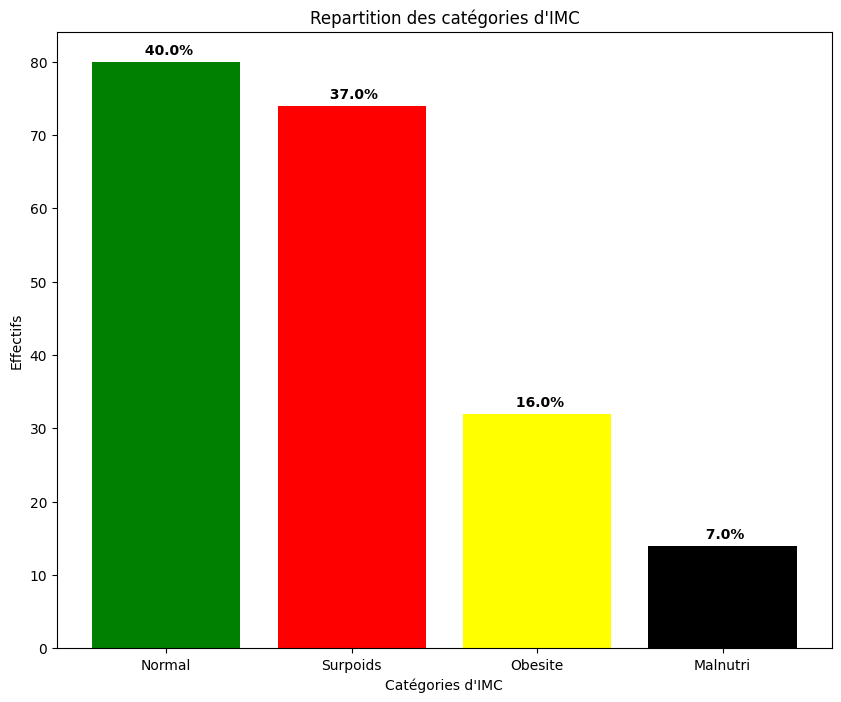

In [14]:
#Creation de categories

bornes = [0, 18.5, 25, 30, float('inf')]
categories = ['Malnutri', 'Normal','Surpoids','Obesite']
df['imc_categories'] = pd.cut(df['imc'], bins = bornes, labels = categories, right = False)
print(df.head())


#Resumé statistique
imc_eff = df['imc_categories'].value_counts()
print (imc_eff)

#Visualisation

#Calcul des pourcentages

total = sum(imc_eff)
pourcentages = [(n/total) * 100 for n in imc_eff]

#Creation du diagramme

plt.figure(figsize = (10, 8))
plt.bar(imc_eff.index, imc_eff.values, color = ["Green", "Red", "Yellow", 'Black'] )

#Ajout des pourcentages

for i, (val,pct) in enumerate(zip(imc_eff, pourcentages)) :      #Zip- assemble les deux listes element par element, 
                                                                 #ennumerate- ajoute un indice i à chaque couple                       
 
    plt.text(i,                                                  #plt.text - est la commande qui ajoute le texte, x =i- position horizontale la barre  
             val + 1,                                            #y =val +1 - un peu au dessus de la barre
             f"{pct : .1f}%",                                    #f"{pct:.1f}"- texte affiché(pct:.1f -un chiffre après la virgule
             ha = "center",                                      #ha ='center' -centrer le texte horizontalement par rapport à la barre
             fontsize= 10, fontweight= "bold")                   #fontsize et fontweight - style d'écriture)


#Titre et Labels

plt.xlabel("Catégories d'IMC")
plt.ylabel("Effectifs")
plt.title("Repartition des catégories d'IMC")
plt.show()

## Dans notre base de donnees seul 40% de nos individus ont un imc normal, avec 7% qui sont malnutris, 16% qui sont obeses et 37% en surpoids.

## ETUDES DES RELATIONS ENTRE VARIABLES

## Nous avons decide de conserver les valeurs aberrantes car elles sont physiologiquement possibles

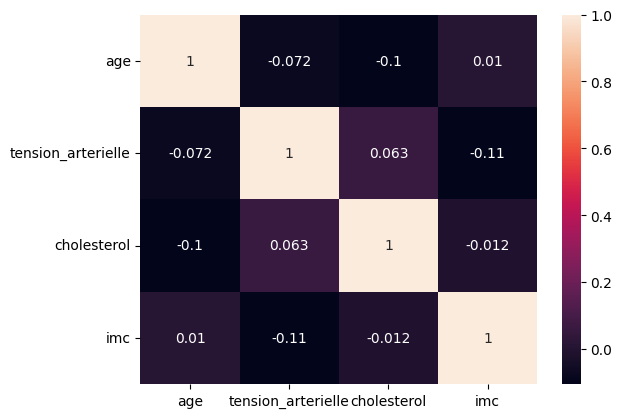

In [15]:
sns.heatmap(df.corr(numeric_only=True), annot=True) 
plt.show()

## Etude de la relation entre l'activité physique et l'imc
## H₀: Il n'existe pas d'association entre les categories d'IMC et le niveau d'activite physique. Ce qui signifie que la différence de pourcentages observee entre les groupes n’est pas significative. 
## H₁: Il existe une association significative entre les categories d'IMC et le niveau d'activite physique. Ce qui signifie que la difference des pourcentages observee entre les groupes est significative.


actf      Intense  Modérée  Sédentaire
imcbd                                 
Malnutri        5        6           3
Normal         31       30          19
Obesite         8       11          13
Surpoids       20       28          26
Pourcentages par ligne(% par categorie d'imc
actf      Intense  Modérée  Sédentaire
imcbd                                 
Malnutri     35.7     42.9        21.4
Normal       38.8     37.5        23.8
Obesite      25.0     34.4        40.6
Surpoids     27.0     37.8        35.1
Pourcentages par colonne(% par categorie d'imc
actf      Intense  Modérée  Sédentaire
imcbd                                 
Malnutri      7.8      8.0         4.9
Normal       48.4     40.0        31.1
Obesite      12.5     14.7        21.3
Surpoids     31.2     37.3        42.6


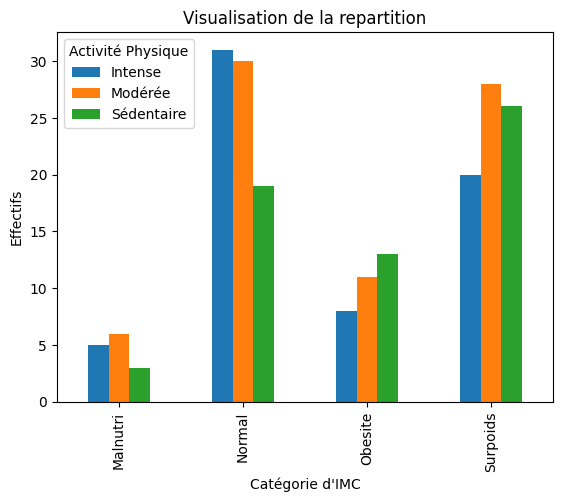

Resultats du test du X² :
- Valeur du X: 5.624
- Degrés de liberté : 6
 - p-value : 0.4666
Effectifs attendus( si independance entre imc et activité physique)
actf      Intense  Modérée  Sédentaire
imcbd                                 
Malnutri     4.48     5.25        4.27
Normal      25.60    30.00       24.40
Obesite     10.24    12.00        9.76
Surpoids    23.68    27.75       22.57
V de Cramer :  0.119


In [16]:
#Creation d'un dataframe

imcbd1 = list(df['imc_categories'])                                 #J'ai d'abord due creer un dataframe pour réaliser mon tableau croisé
actf1 = list(actf)
df1 = pd.DataFrame({"actf" : actf1, "imcbd" : imcbd1}) 

#Creation du tableau croisé

tc1 = pd.crosstab(df1["imcbd"], df1["actf"])
print(tc1) 

#Pourcentage par ligne
tc1_row_pct = pd.crosstab(df1["imcbd"], df1["actf"], normalize = "index") * 100
print("Pourcentages par ligne(% par categorie d'imc")
print(tc1_row_pct.round(1))

#Pourcentage par colonne
tc1_col_pct = pd.crosstab(df1["imcbd"], df1["actf"], normalize = "columns") * 100
print("Pourcentages par colonne(% par categorie d'imc")
print(tc1_col_pct.round(1))


#Graphique en barres

tc1.plot(kind = "bar")

#Titre et labels

plt.title("Visualisation de la repartition")
plt.xlabel("Catégorie d'IMC")
plt.ylabel("Effectifs")
plt.legend(title = "Activité Physique")
plt.show()

#Test de Chi2

#Importation
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tc1)     #Cette ligne permet le calcul du chi2, dof(degré de liberté),expected(valeur attendues) et la pvalue

print("Resultats du test du X² :")
print(f"- Valeur du X: {chi2:.3f}")               #f" est un f)strigs qui permet d'integrer directement les valeurs dans le texte
print(f"- Degrés de liberté : {dof}")
print(f" - p-value : {p:.4f}")

#Tableau des effectifs attendus

expected_df = pd.DataFrame(expected, index= tc1.index, columns = tc1.columns)
print("Effectifs attendus( si independance entre imc et activité physique)")
print(expected_df.round(2))                        #Apres un test de chi2 Le V de cramer est tres utile pour interpreter la force du lien

#Realisation du V de Cramer

n = tc1.to_numpy().sum()                           #effectif total
k = min(tc1.shape)                                 #plus petit nombre de ligne ou de colonnes
cramers_v = np.sqrt(chi2 / (n* (k -1)))            #formule, "sqrt : squared root"

print(f"V de Cramer : {cramers_v : .3f}")

## Avec une valeur de p > 0.05 nous concluons que H₀ est acceptee a raison. Le test de chi carre n'a pas mis en evidence d'association statistiquement significative entre l'activite physique et l'IMC dans notre base de donnees (0.46> 0.05).

## Etude de la relation entre le diabete et la tension arterielle
## H₀: Il n’y a aucune différence de tension arterielle entre les diabetiques et les non diabetiques. Ce qui signifie que la différence de moyennes entre les groupes n’est pas significative. 
## H₁: Il existe une difference de tension arterielle entre les diabetiques et les non diabetiques. Ce qui signifie que la difference des moyennes entre les groupes est significative.

In [17]:
#Test de Student ou Test de comparaison des moyennes avec test de Levene ou test de Bartlett et test de Kolmogorov

#Formation des groupes

group1 = df.loc[df["diabete"] == "Oui"]["tension_arterielle"]
group2 = df.loc[df["diabete"] == "Non"]["tension_arterielle"]
print("valeurs groupe 1:",group1)
print("Valeurs groupe :",group2)

#Test de Levene et Bartlett avec stats de scipy

from scipy.stats import ttest_ind, levene, bartlett

stat_levene, p_levene = levene(group1, group2)
stat_bartlett, p_bartlett = bartlett(group1, group2)

print(f"Test de Levene : stat = {float(stat_levene) : .3f}, p-value = {float(p_levene):.4f}")
print(f"Test de Bartlett : stat = {float(stat_bartlett) : .3f}, p-value = {float(p_bartlett):.4f}")

#Avec un p superieur à 0.05, nous concluons que les variances de nos deux droupes sont égales

valeurs groupe 1: 4      123
5      120
17     107
19     111
22     108
35     140
38      96
41     120
52     124
55     121
56     137
60     116
69      89
71     130
89     134
94     118
95     104
103    116
109     85
117    136
119    105
122    108
127    133
131    107
138    133
141    128
148    124
154    127
157    131
178    132
181    141
183    108
186    125
190    137
199    151
Name: tension_arterielle, dtype: int64
Valeurs groupe : 0      118
1      126
2      130
3      113
6      121
      ... 
194    112
195    113
196    125
197    113
198    124
Name: tension_arterielle, Length: 165, dtype: int64
Test de Levene : stat =  0.001, p-value = 0.9750
Test de Bartlett : stat =  1.424, p-value = 0.2327


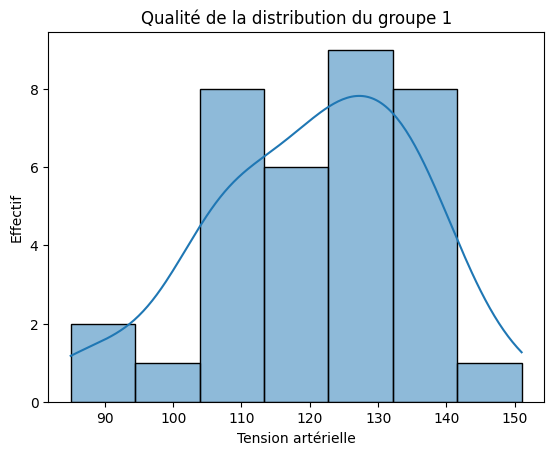

Statistique de test 0.0846912268906253
Valeur de p 0.9450196549013967
Les données suivent une distribution normale


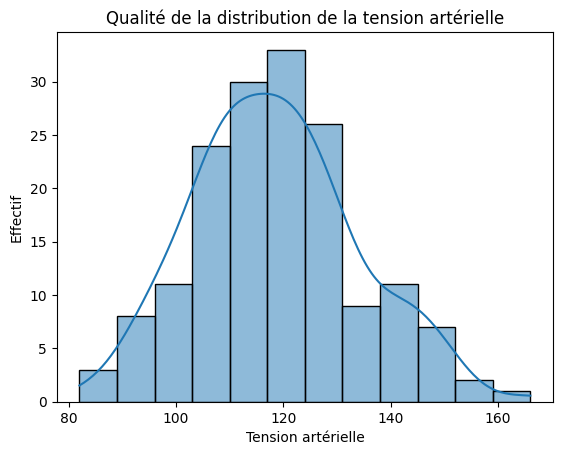

Statistique de test 0.06397008472017901
Valeur de p 0.4893927253075244
Les données suivent une distribution normale


In [18]:
#Verification de la normalité de distribution dans les deux groupes

#group1

sns.histplot(group1, kde = True)          
plt.title("Qualité de la distribution du groupe 1")
plt.ylabel("Effectif")
plt.xlabel("Tension artérielle")
plt.show()

#Test de kolmogorov-smirnov

moy = group1.mean()
sd = group1.std()
stat, p = stats.kstest(group1, "norm", args = (moy, sd))
print("Statistique de test", stat)
print("Valeur de p", p)
if p > 0.05:
    print("Les données suivent une distribution normale")
else:
    print("Les données ne suivent pas une distribution normale")

#group2


sns.histplot(group2, kde = True)           
plt.title("Qualité de la distribution de la tension artérielle")
plt.ylabel("Effectif")
plt.xlabel("Tension artérielle")
plt.show()

#Test de kolmogorov

moy = group2.mean()
sd = group2.std()
stat, p = stats.kstest(group2, "norm", args = (moy, sd))
print("Statistique de test", stat)
print("Valeur de p", p)
if p > 0.05:
    print("Les données suivent une distribution normale")
else:
    print("Les données ne suivent pas une distribution normale")


In [19]:
#Nos variables remplissent toutes les conditions, passons au test de Student

stat_t, p_t = ttest_ind(group1, group2, equal_var = True)
print("Test de Student")
print(f"Staistique t = {stat_t :.3f}, p-value = {p_t:.4f}")

if p_t < 0.05:
    print("Les moyennes sont significativement différentes")
else:
    print("Aucune différence significative entre les moyennes")


Test de Student
Staistique t = 0.806, p-value = 0.4214
Aucune différence significative entre les moyennes


## Avec une valeur p > 0.05 nous concluons que H₀ est acceptee a raison. Le test de Student n'a pas mis en evidence d'association statistiquement significative entre la tension arterielle et le diabete dans notre base de donnees (0.42> 0.05).

## Etude de la relation entre la tension arterielle et le Cholesterol

## Ho: Il n’existe aucune association lineaire entre la tension arterielle et le Cholesterol. 
## H1: Il existe aucune association lineaire entre la tension arterielle et le Cholesterol. 

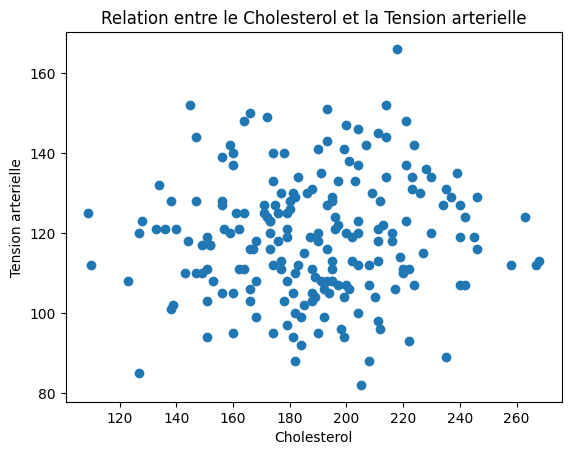

r: 0.06296021102578604
p : 0.37578464390581723
r: 0.06869834785863671
p: 0.33374694618039946


<Axes: xlabel='cholesterol', ylabel='tension_arterielle'>

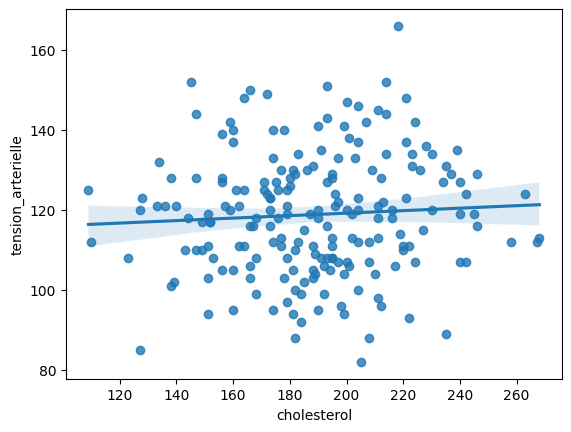

In [20]:
#Recherche d'une relation lineaire

plt.scatter(chol, tensar )
plt.xlabel('Cholesterol')
plt.ylabel('Tension arterielle')
plt.title("Relation entre le Cholesterol et la Tension arterielle")
plt.show()

#Pearson

from scipy.stats import pearsonr
r,p = pearsonr(chol, tensar)
print ('r:', r)
print('p :', p)

#Spearman

from scipy.stats import spearmanr
r,p = spearmanr(chol, tensar)
print('r:', r)
print('p:', p)

#Verification visuelle 

sns.regplot( x = 'cholesterol', y = 'tension_arterielle', data = df)

## La visualisation du nuage de point n'a pas mis en evidence une relation entre le taux de cholesterol et la tension arterielle. En consequence, une correlation de Spearman a ete realisee afin d'explorer une eventuelle relation monotone. 

## En conclusion, il n'existe pas de correlation entre le taux de cholesterol et la tension arterielle.

## Etude de la relation entre l'age et le cholesterol
## H₀: Il n'existe pas de difference d'age significative entre les groupes de cholesterol
## H₁: Il existe une difference d'age significative entre les groupes de cholesterol.

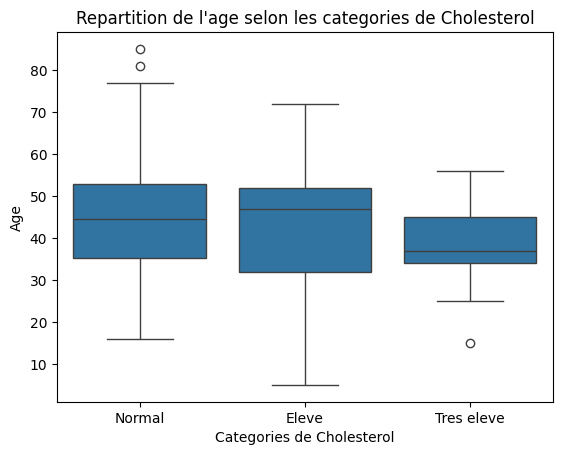

Eleve 0.3073601192109616
Normal 0.27687125312402916
Tres eleve 0.9624020393158631
p: 0.6008999800825798


In [21]:
#Exploration graphique

sns.boxplot( x = 'chol_categories', y = 'age', data = df)
plt.xlabel("Categories de Cholesterol")
plt.ylabel('Age')
plt.title("Repartition de l'age selon les categories de Cholesterol")
plt.show()

#Verification de la normalite dans chaque groupe

from scipy.stats import shapiro
for g in df['chol_categories'].unique():
    stat, p = shapiro(df.loc[df['chol_categories']== g, 'age'])
    print(g, p)

#Verification de l'Homogeneite des variances

from scipy.stats import levene

groups =[df.loc[df["chol_categories"] == g, 'age'] for g in df['chol_categories'].dropna().unique()]
stat, p = levene(*groups)
print('p:', p)

In [22]:
#ANOVA 

from scipy.stats import f_oneway
stat,p = f_oneway(*groups)
print('p:',p)

p: 0.23476948390252805


## Aucune difference statistiquement significative n'a ete observee entre les groupes de cholesterol(ANOVA,p = 0.23 > 0.05)